In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [ ]:
#averoom = total_rooms/households
#avebedrooms = total_bedrooms/households

In [4]:
df['AveRooms'] = df['total_rooms']/df['households']
df['AveBedrms'] = df['total_bedrooms']/df['households']

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,AveRooms,AveBedrms
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.984127,1.023810
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.238137,0.971880
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,8.288136,1.073446
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.817352,1.073059
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,6.281853,1.081081


In [7]:
df.drop(columns=['total_rooms','total_bedrooms','households'],axis=1,inplace=True)

In [8]:
df.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,AveRooms,AveBedrms
0,-122.23,37.88,41,322,8.3252,452600,6.984127,1.023810
1,-122.22,37.86,21,2401,8.3014,358500,6.238137,0.971880
2,-122.24,37.85,52,496,7.2574,352100,8.288136,1.073446
3,-122.25,37.85,52,558,5.6431,341300,5.817352,1.073059
4,-122.25,37.85,52,565,3.8462,342200,6.281853,1.081081


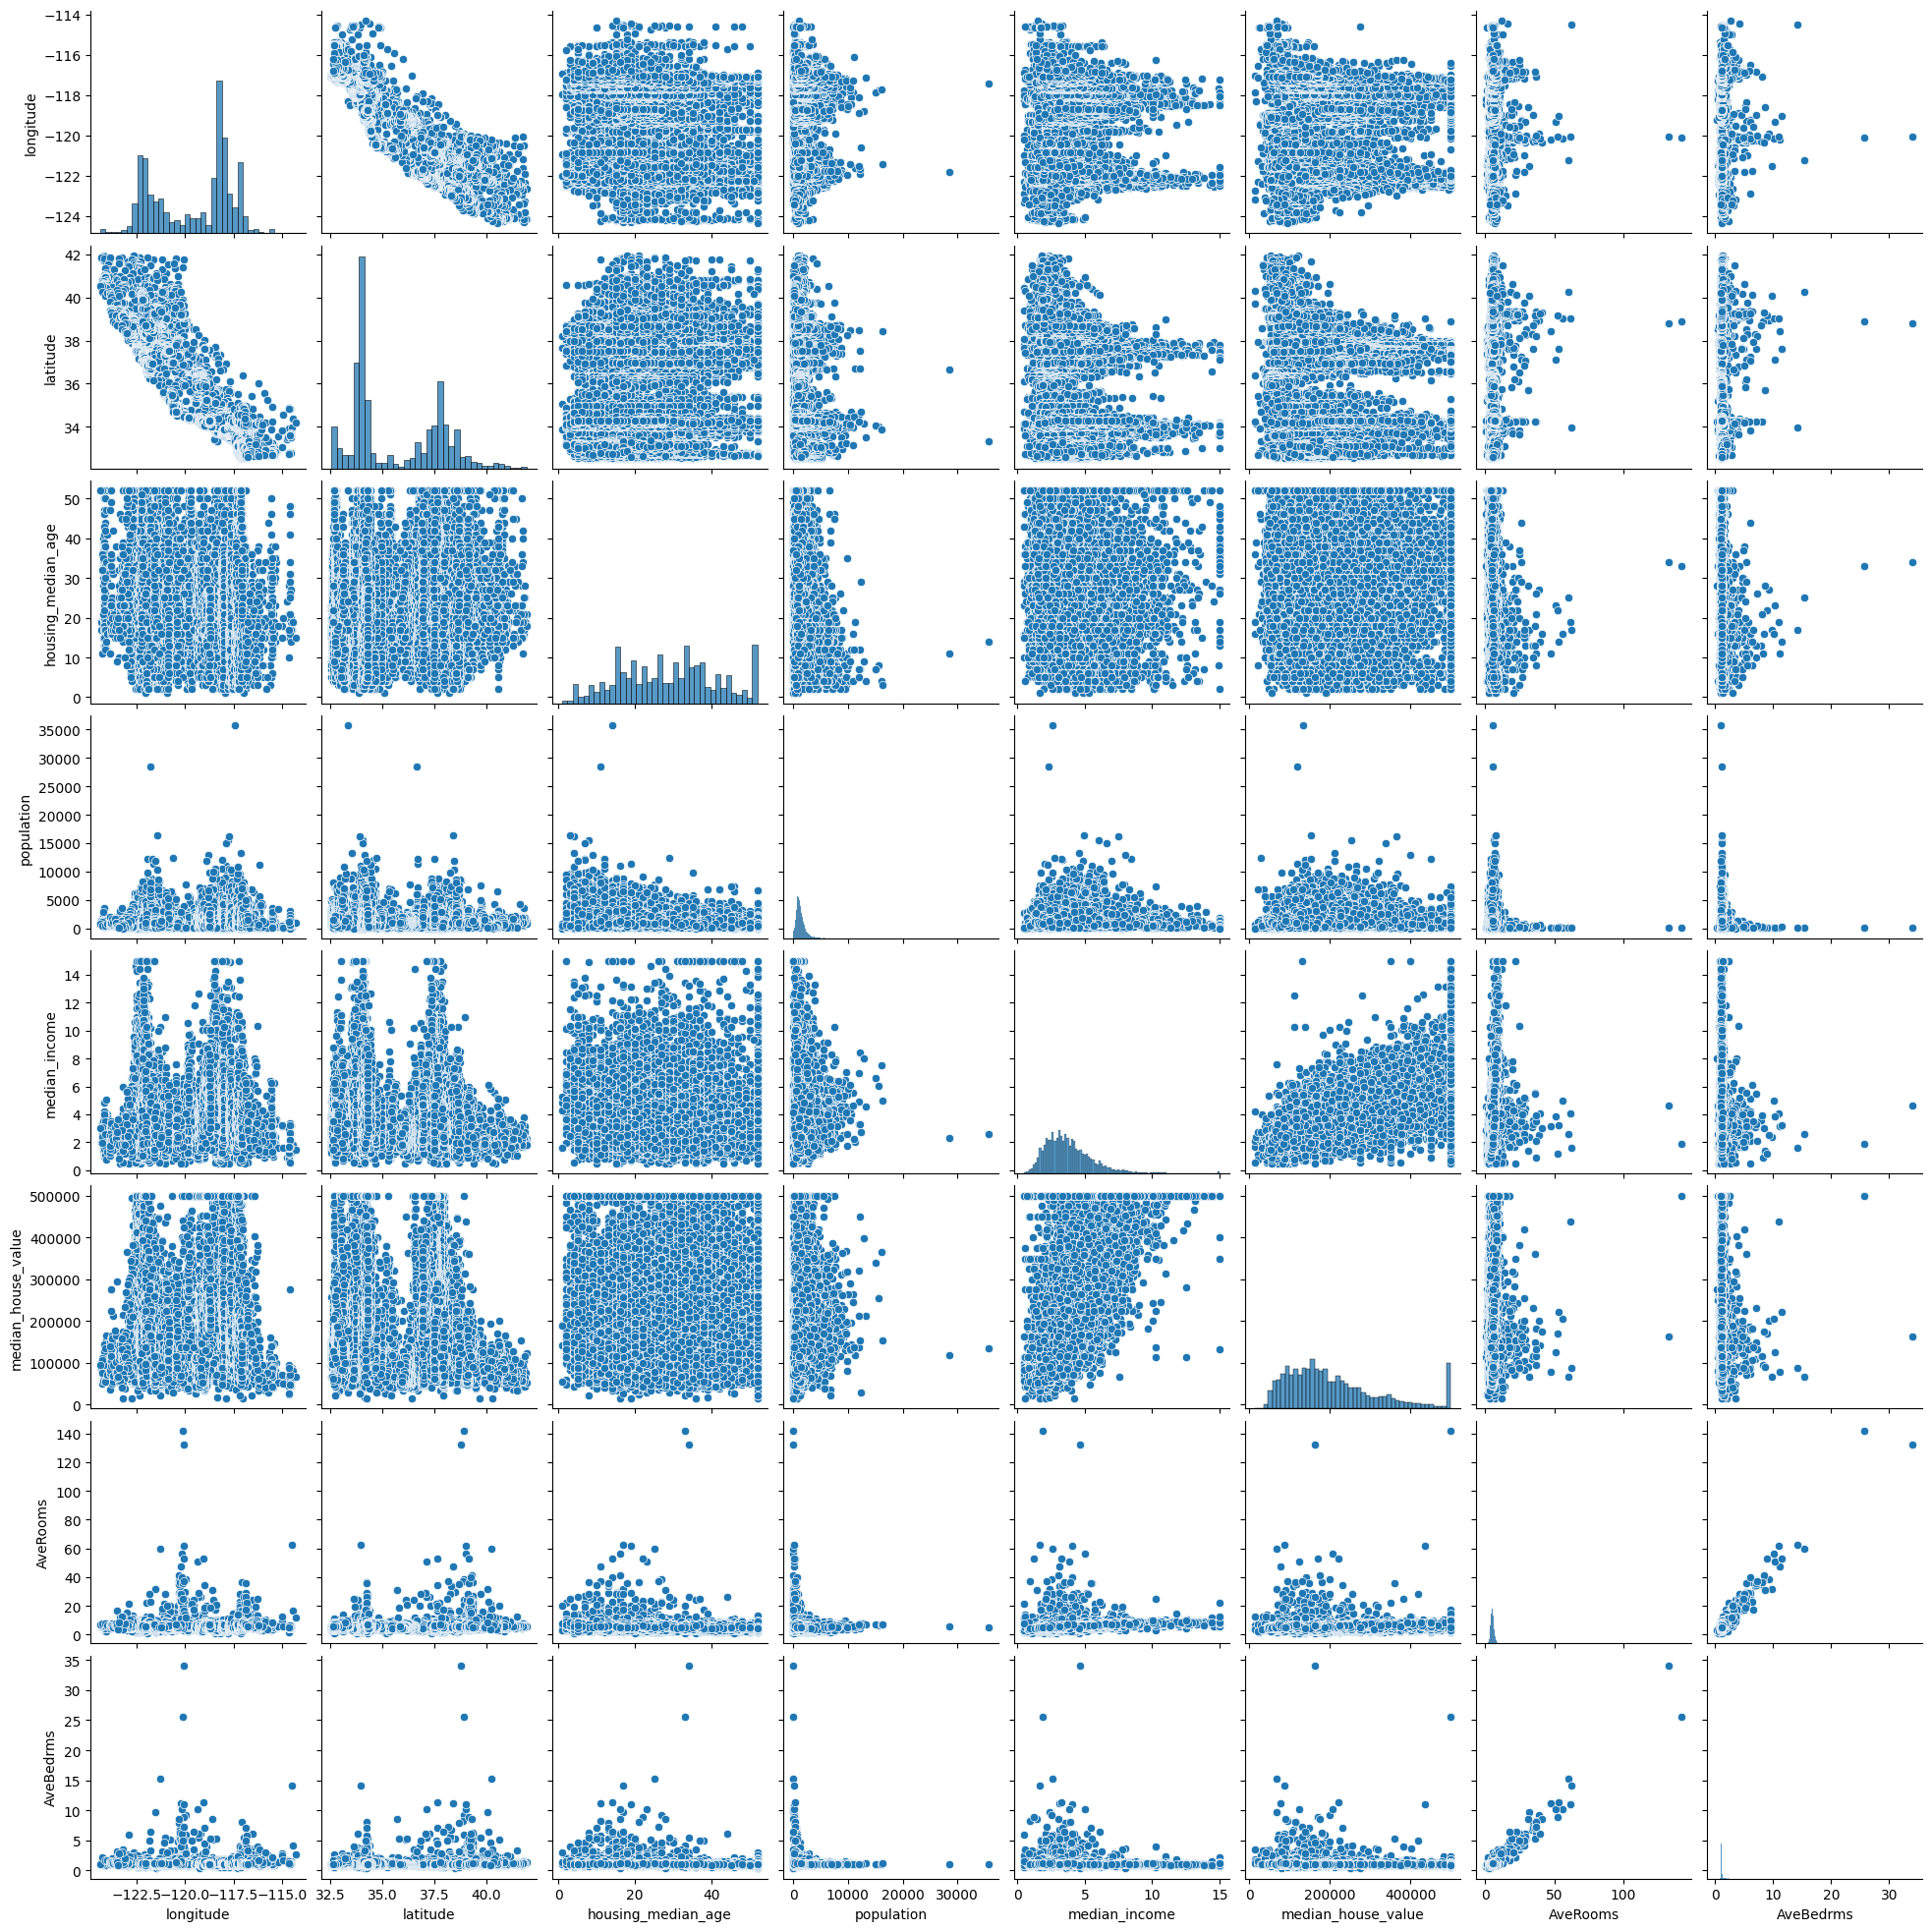

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,AveRooms,AveBedrms
longitude,1.000000,-0.924664,-0.108197,0.099773,-0.015176,-0.045967,-0.027540,0.013402
latitude,-0.924664,1.000000,0.011173,-0.108785,-0.079809,-0.144160,0.106389,0.070025
housing_median_age,-0.108197,0.011173,1.000000,-0.296244,-0.119034,0.105623,-0.153277,-0.077918
population,0.099773,-0.108785,-0.296244,1.000000,0.004834,-0.024650,-0.072213,-0.066510
median_income,-0.015176,-0.079809,-0.119034,0.004834,1.000000,0.688075,0.326895,-0.062299
median_house_value,-0.045967,-0.144160,0.105623,-0.024650,0.688075,1.000000,0.151948,-0.046739
AveRooms,-0.027540,0.106389,-0.153277,-0.072213,0.326895,0.151948,1.000000,0.848616
AveBedrms,0.013402,0.070025,-0.077918,-0.066510,-0.062299,-0.046739,0.848616,1.000000


<Axes: >

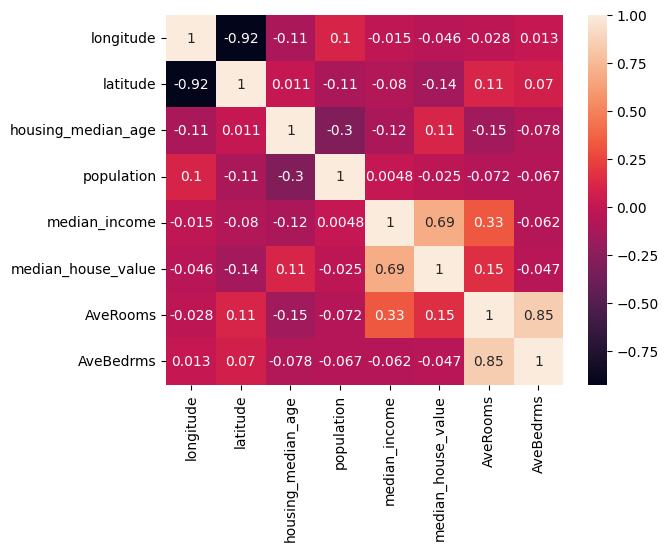

In [13]:
sns.heatmap(df.corr(), annot=True)

In [23]:
## independent and dependent features
X=df[['longitude','latitude','housing_median_age','population','median_income','AveRooms','AveBedrms']]

In [24]:
y=df['median_house_value']

In [25]:
print(type(X), type(y))
print(X.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(20640, 7)
(20640,)


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.33)

In [28]:
X_train.shape

(13828, 7)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
#model training
from sklearn.linear_model import LinearRegression
regression= LinearRegression()

In [34]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
X = df[['longitude','latitude','housing_median_age',
        'population','median_income','AveRooms','AveBedrms']]

y = df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10
)


In [39]:
X_train.isna().sum()


longitude               0
latitude                0
housing_median_age      0
population              0
median_income           0
AveRooms                0
AveBedrms             145
dtype: int64

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

,steps,"[('imputer', ...), ('regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,fit_intercept,True


In [41]:
y_pred = pipeline.predict(X_test)


In [42]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(score)

53834.10517270076
5555254765.94977
0.5911730020519574


In [43]:
## Assumptions


Text(0, 0.5, 'Test predicted data')

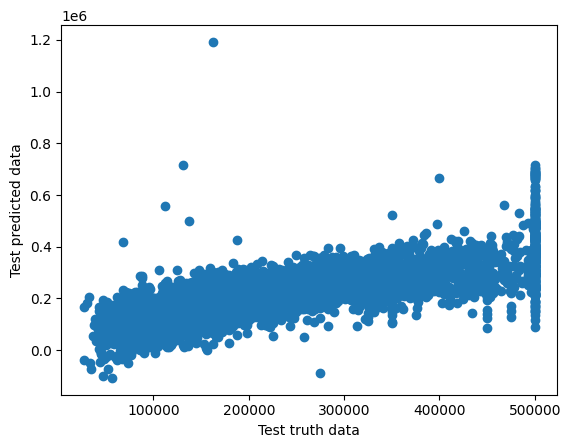

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test predicted data")

In [45]:
residuals = y_test-y_pred

In [46]:
residuals

20303   -133940.864557
16966     96334.654474
10623    -74378.868970
6146     -31257.101000
2208     -66413.321167
             ...      
13490    -24373.968772
9340      51112.037244
17439   -136720.587700
2602       4652.152224
7180     -63493.261800
Name: median_house_value, Length: 6812, dtype: float64

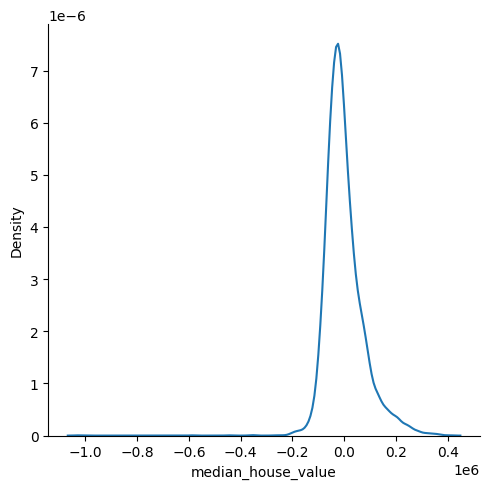

In [47]:
sns.displot(residuals,kind="kde")

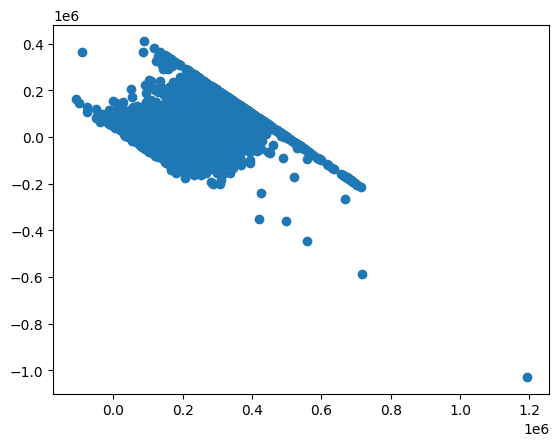

In [48]:
plt.scatter(y_pred,residuals)

In [49]:
import pickle

In [51]:
pickle.dump(regression,open('regressor.pkl','wb'))

In [54]:
model=pickle.load(open('regressor.pkl','rb'))

In [57]:
y_pred = model.predict(X_test)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.